# Residential and Commercial Crime Rate in Cambridge

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Jayminn Anand
- Vincent Luu
- Srikar Mannam
- Slater Mutunga
- Angela Perez

# Abstract


When creating our research question, we knew we wanted it to be about the crime rate, so we chose a specific type of crime, theft, and picked a time period that could be correlated with that crime. The reason we chose to limit our scope to the City of Cambridge was that we wanted to have a large enough dataset to accurately represent the crime rate within a city but not too much data from different places to the point where other factors like poverty rate, education, or weather would affect the data. We also wanted to pick an area within the U.S. since we wanted a place that would commonly celebrate Christmas, as that is one of the core considerations of our research question. We found a dataset on the City of Cambridge that fit our criteria, and we also found that it happened to have a very high crime rate compared to other cities in the U.S., so we thought it would make for an interesting point of analysis.

To first get a feel for the dataset, we looked at the mean and median of the months that all crimes and theft-related crimes occurred in to see if it tended to any one side. Then, we plotted out the count of theft crimes across all months in a year for all the years within the dataset to see if there was any noticeable difference between December and the other months. Since plotting the count data fails to take into consideration the total number of crimes that happened within the months as well, we also plotted the proportion of theft-related crime to total crimes, to see if the rate of crime had any noticeable difference in December.

From our data and plots, we found December did not tend to have the highest amount or rate of theft-related crimes compared to all the other months, instead it was often August that had the most for both count and proportion of theft crimes. We did notice however that December tended to have a higher count and proportion of theft-related crimes when compared to the months in Winter and Spring, which are December to June. So while December may not have had a higher crime rate compared to all the other months within a year, it did have a higher crime rate compared to other months that are in seasons of cooler climates.

# Research Question

How do residential and commercial burglary rates in the city of Cambridge during December compare to the rest of the year from 2009-2024?


## Background and Prior Work

Crime patterns often fluctuate based on various factors like weather or location. Our research question focuses on one of these factors, the time of year close to Christmas. We also limited the geographical scope of our research question considering that crime data is quite large and difficult to manage and analyze over a large scope. We chose a city with a sizable population that has publicly available crime data. 

The City of Cambridge has a population of around 118,000 people <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) and has a high crime rate in proportion to its population. In fact, Cambridge has a total crime index of 6, meaning it's safer than only 6% of cities in the U.S. with a property crime rate of 30.63 per 1000 residents. <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) In addition, since Cambridge is in America, it's likely that most people celebrate Christmas, which is critical to our research question. For these reasons, we chose Cambridge as the location of choice for our analysis.

For prior research on our research question, according to a blog from DeepSentinel, U.S. burglary rates in 2023 spiked in December by 20% compared to the average monthly rate of  robbery and personal larceny. <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) Although the research from this blog post encapsulates a much bigger scope than our research question does, it does show that holiday theft is a real phenomenon in the U.S. as a whole, and the extent to which this affects the City of Cambridge in particular is not nearly as researched, making it worth analyzing.


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Demographics and Statistics FAQ. *City of Cambridge CDD, Massachusetts*. https://www.cambridgema.gov/cdd/factsandmaps/demographicfaq  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Cambridge, MA Crime Rates and Statistics. *NeighborhoodScout*. https://www.neighborhoodscout.com/ma/cambridge/crime 
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Chen, WInston. (3, Dec. 2024) 'Tis the Season to prevent Holiday Crimes: A Homeowner's Guide. *Deep Sentinel*
https://www.deepsentinel.com/blogs/tis-the-season-for-holiday-break-ins-and-package-thefts/ 


# Hypothesis


We hypothesize that reported residential and commercial burglaries increase by at least 10% during December compared to any other month-long periods throughout the rest of the year in the City of Cambridge. This is driven by increased holiday travel and presence of high-value items within stores and homes when Christmas is near.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Cambridge Crime Data
  - Link to the dataset: https://www.kaggle.com/datasets/melissamonfared/cambridge-crime-data-2009-2024
  - Number of observations: ~ 95,000
  - Number of variables: 7
  - Variable List:
      - FileNumber: Provides a unique identifier for each observation (object/string) 
      - ReportDate: The date the crime was reported (datetime)
      - CrimeDate: The data and time the crime occurred (object/string)
      - Crime: Describes the type of crime that occurred (object/string)
      - year: The year the crime occurred (int)
      - month: The month the crime occurred (int)
      - dec: Determines if the crime occurred in December or not


This dataset contains reported crime incidents in the City of Cambridge and has data spanning from 2009 to 2024. This dataset provides information
on the types of crime, when the crime occurred, and when it was reported which is needed for our research question as it is reliant on the type of crime and the date of the crime. All the datatypes are objects except for the year and time columns which are ints. It also includes data about the areas in which the crimes happened within the City of Cambridge but we will not be using that data for this analysis. The dataset is already well formatted in terms of its entries, and there are no missing values, so we will only need to remove the columns that
we do not need for our analysis.


## Cambridge Crime Dataset

In [11]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#read and clean dataset
df = pd.read_csv('https://raw.githubusercontent.com/vluu03/COGS108_Repo/refs/heads/main/Crime_Reports_20240701.csv')
clean = df[['File Number','Date of Report','Crime Date Time','Crime']]
clean = clean.rename(columns={"File Number":"FileNumber", "Date of Report":"ReportDate", "Crime Date Time":"CrimeDate"})
clean['ReportDate'] = pd.to_datetime(clean['ReportDate']) 
clean['year'] = clean['ReportDate'].dt.year.astype(int)
clean['month'] = clean['ReportDate'].dt.month.astype(int)
clean['dec'] = (clean['month'] == 12)
clean

FileNumber          ReportDate                            CrimeDate  \
0      2009-01323 2009-02-21 09:53:00             02/21/2009 09:20 - 09:30   
1      2009-01324 2009-02-21 09:59:00  02/20/2009 22:30 - 02/21/2009 10:00   
2      2009-01327 2009-02-21 12:32:00  02/19/2009 21:00 - 02/21/2009 12:00   
3      2009-01331 2009-02-21 15:05:00             02/21/2009 15:00 - 15:10   
4      2009-01346 2009-02-22 05:02:00                     02/22/2009 05:02   
...           ...                 ...                                  ...   
95918  2024-03755 2024-05-07 13:13:00             05/04/2024 12:00 - 18:00   
95919  2024-03756 2024-05-07 14:41:00             05/07/2024 14:40 - 14:41   
95920  2024-03777 2024-05-07 20:13:00             05/07/2024 15:00 - 19:15   
95921  2024-03806 2024-05-08 16:09:00             05/07/2024 04:00 - 04:05   
95922  2024-03824 2024-05-09 10:23:00             05/05/2024 11:30 - 13:00   

                    Crime  year  month    dec  
0                 Threats  2009      2  False  
1              Auto Theft  2009      2  False  
2             Hit and Run  2009      2  False  
3          Larceny (Misc)  2009      2  False  
4                     OUI  2009      2  False  
...                   ...   ...    ...    ...  
95918     Larceny from MV  2024      5  False  
95919            Accident  2024      5  False  
95920  Larceny of Bicycle  2024      5  False  
95921     Larceny from MV  2024      5  False  
95922         Hit and Run  2024      5  False  

[95923 rows x 7 columns]

# Results

## Exploratory Data Analysis


### Filtering and Categorizing Data

First, we want to see the different types of crimes that are listed in the dataset to see which ones are related to theft.

In [14]:
#All unique types of crimes
unique = clean['Crime'].unique()
unique

array(['Threats', 'Auto Theft', 'Hit and Run', 'Larceny (Misc)', 'OUI',
       'Aggravated Assault', 'Commercial Break', 'Street Robbery',
       'Housebreak', 'Shoplifting', 'Forgery', 'Simple Assault',
       'Warrant Arrest', 'Disorderly', 'Larceny from Building',
       'Mal. Dest. Property', 'Larceny from MV', 'Trespassing',
       'Larceny from Person', 'Missing Person', 'Larceny from Residence',
       'Harassment', 'Liquor Possession/Sale', 'Flim Flam', 'Phone Calls',
       'Larceny of Bicycle', 'Annoying & Accosting', 'Drugs',
       'Indecent Exposure', 'Larceny of Plate', 'Sex Offender Violation',
       'Counterfeiting', 'Rec. Stol. Property', 'Commercial Robbery',
       'Kidnapping', 'Drinking in Public', 'Larceny of Services',
       'Peeping & Spying', 'Homicide', 'Extortion/Blackmail', 'Stalking',
       'Weapon Violations', 'Prostitution', 'Arson', 'Embezzlement',
       'Admin Error', 'Violation of R.O.', 'Violation of H.O.',
       'Domestic Dispute', 'Gambling', '

Now we want to make a new column that determines if a crime was theft-related or not by filtering for certain words. We can also drop all the reports in 2024 since the dataset stopped collecting data after May.

In [72]:
clean = clean[clean['year'] != 2024]
clean['theft'] = clean['Crime'].str.contains('Theft|Shoplifting|Robbery|Housebreak|Larceny')
clean['res_theft'] = clean['Crime'].str.contains('Housebreak|Building|Person|Residence|Street')
clean['com_theft'] = clean['Crime'].str.contains('Commercial|Shoplifting')
clean = clean.sort_values(by='ReportDate')
clean

FileNumber          ReportDate                 CrimeDate  \
1819   2009-00002 2009-01-01 00:39:00          01/01/2009 00:39   
102    2009-00003 2009-01-01 01:34:00          01/01/2009 01:34   
103    2009-00004 2009-01-01 01:43:00  01/01/2009 02:20 - 02:35   
104    2009-00006 2009-01-01 02:34:00  01/01/2009 02:15 - 02:35   
139    2009-00008 2009-01-01 02:37:00          01/01/2009 02:37   
...           ...                 ...                       ...   
92487  2023-11890 2023-12-31 12:11:00          12/31/2023 12:10   
92646  2023-11894 2023-12-31 17:33:00  12/31/2023 17:33 - 17:45   
92784  2023-11895 2023-12-31 18:01:00          12/31/2023 18:00   
92488  2023-11897 2023-12-31 20:55:00  12/31/2023 20:45 - 21:00   
92489  2023-11901 2023-12-31 22:36:00  12/31/2023 22:30 - 22:35   

                     Crime  year  month    dec  theft  res_theft  com_theft  
1819        Simple Assault  2009      1  False  False      False      False  
102         Simple Assault  2009      1  False  False      False      False  
103     Aggravated Assault  2009      1  False  False      False      False  
104             Disorderly  2009      1  False  False      False      False  
139    Mal. Dest. Property  2009      1  False  False      False      False  
...                    ...   ...    ...    ...    ...        ...        ...  
92487          Shoplifting  2023     12   True   True      False       True  
92646       Simple Assault  2023     12   True  False      False      False  
92784       Simple Assault  2023     12   True  False      False      False  
92488  Mal. Dest. Property  2023     12   True  False      False      False  
92489       Simple Assault  2023     12   True  False      False      False  

[93164 rows x 10 columns]

These columns will help us in the rest of the EDA section by giving us an easy way to tell whether a crime was theft-related or not and if they were residential or commercial. This gives an idea of how many of each of these crimes there are so we can filter out anything that isn't crime-related.

In [18]:
res_thefts = clean[clean['res_theft'] == True]
com_thefts = clean[clean['com_theft'] == True]
print("Residential Theft Count: " +  str(len(res_thefts)),"\n",
       "Commercial Theft Count: " + str(len(com_thefts)), "\n", 
       "Total Theft Count: " + str(len(res_thefts)+ len(com_thefts)), "\n",
       "Total Crime Count: " +str(len(clean)))

Residential Theft Count: 18267 
 Commercial Theft Count: 6618 
 Total Theft Count: 24885 
 Total Crime Count: 93164


So that means about 27% of all the crimes in this dataset are either commercial or residential theft crimes. Around 73% of those burglaries are residential and 27% are commercial, which means people tend to steal from homes and individuals more often than stores or businesses. 

### Mean and Median of the Month Column

To determine if crime occurrences tend to cluster toward the latter half of the year, we calculated the mean and median values for the month column.


In [21]:
month_stats = clean['month'].describe()

print(month_stats)

count    93164.000000
mean         6.724003
std          3.324811
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


The mean month value is 6.62, indicating that, on average, crimes tend to occur slightly more in the second half of the year.
The median month value is 7, indicating that at least half of all reported crimes happened in July or later.
The 25th percentile is at month 4 (April), and the 75th percentile is at month 9 (September), showing that most crimes are concentrated between these months.
Since the maximum value is 12 and the distribution is fairly spread out, further investigation is necessary to determine whether December has a significantly higher rate of theft-related crimes than other months.

## Mean and Median of Theft-Related Crimes

Next, we want to see if theft-related crimes tend to cluster towards the latter half of the year as well.

In [24]:
res_thefts_mean = res_thefts['month'].mean()
com_thefts_mean = com_thefts['month'].mean()
print(res_thefts_mean, com_thefts_mean)

6.702304702468933 6.64233907524932


Here we can see that both residential and commercial crimes have a mean above 6, which means that both of these crimes slightly tend towards that latter half of the year, which may indicate that residential and commercial thefts may occur more often in December, however since other months could also be affecting the mean here, this is data is not conclusive and we still need to do more research.

### Residential Theft Count

Now we will plot out the parts of the data to get a visual representation of the residential dataset pertaining to our research question.

Text(0, 0.5, 'Theft Counts')

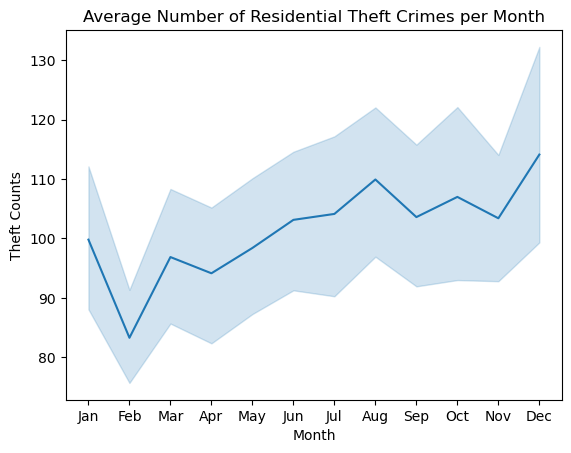

In [28]:
#get count
theft_counts = clean.groupby(["year", "month"])["res_theft"].sum().reset_index()
theft_counts

#plot
sns.lineplot(data=theft_counts, x='month', y='res_theft')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Average Number of Residential Theft Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Theft Counts')

This line plot shows us the average number of residential theft crimes per month. We see some fluctuation throughout the year but theft gradually increases toward the end of the year and peaks in December. Since the count in December is noticeably higher compared to the averages of all other months, this strongly supports our hypothesis that December has a higher theft rate compared to the other months.

### Commercial Theft Count

Now we will look at the same type of graph on commercial theft to see if there are any noticeable differences compared to the residential graph.

Text(0, 0.5, 'Theft Counts')

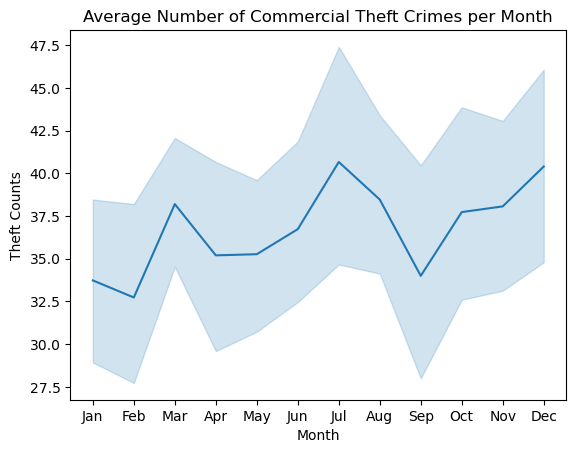

In [32]:
#get count
theft_counts = clean.groupby(["year", "month"])["com_theft"].sum().reset_index()
theft_counts

#plot
sns.lineplot(data=theft_counts, x='month', y='com_theft')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Average Number of Commercial Theft Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Theft Counts')

This line plot shows the average number of commercial thefts per month. This lineplot is a lot more volatile compared to the previous residential graph however we do see a gradual increase toward the end of the year as well. The average count for December is only rivaled by the average count in August. This still supports our hypothesis since December has a higher average count than most of the other months, but not as much as the residential count.

### Residential Theft Proportion

Since the average counts of residential and commercial thefts do not take into consideration the total number of crimes that occurred that month, it may not be completely accurate in representing the theft crime rate of that month. To address this, we will graph the proportion of residential theft to give a more accurate view of the theft rate.

Text(0, 0.5, 'Theft Proportion')

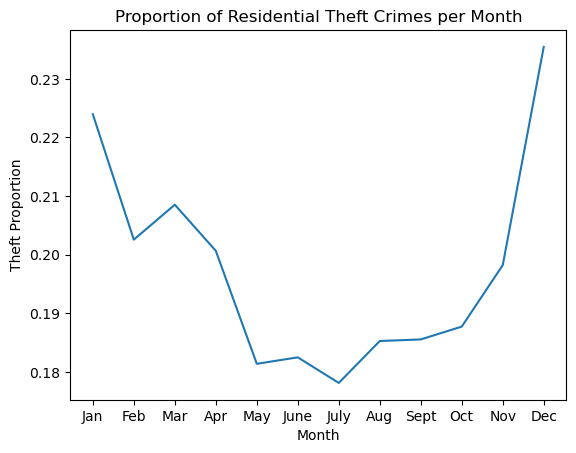

In [36]:

#Get crime and total counts
crime_count = clean.groupby('month').size()
res_theft_count = clean[clean['res_theft']].groupby('month').size()

#Compute proportion
res_theft_prop = (res_theft_count / crime_count).reset_index()
res_theft_prop.columns = ['Month', 'TheftProportion']

#plot
sns.lineplot(data=res_theft_prop, x='Month', y='TheftProportion')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title('Proportion of Residential Theft Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Theft Proportion')

This line plot highlights the proportion of residential theft relative to total thefts per month. During December we see a significant spike in residential theft further starting around October proving that December is a key month for residential theft. This strongly supports our hypothesis since the proportion of residential theft crime is way higher than every other month except for January, which is right after December. 

### Commercial Theft Proportion

Text(0, 0.5, 'Theft Proportion')

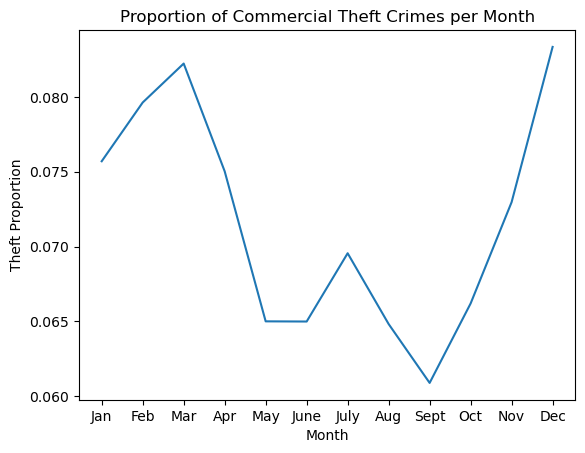

In [39]:
#Get crime and total counts
crime_count = clean.groupby('month').size()
com_theft_count = clean[clean['com_theft']].groupby('month').size()

#Compute proportion
com_theft_prop = (com_theft_count / crime_count).reset_index()
com_theft_prop.columns = ['Month', 'TheftProportion']

#plot
sns.lineplot(data=com_theft_prop, x='Month', y='TheftProportion')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.title('Proportion of Commercial Theft Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Theft Proportion')

This line plot highlights the proportion of commercial theft relative to total thefts per month. During December we also see a significant spike in commercial theft starting in September further proving that December is a key month for commercial theft as well as theft as a whole. This still supports our hypothesis since the theft proportion in December is still higher than most other months.

### Percentage Change in Proportion of Residential Theft

Finally, to answer our research question, we will look at the percent change of December's residential theft proportion relative to every other month.

In [43]:
#code
res_dec_prop = res_theft_prop.loc[res_theft_prop['Month'] == 12, 'TheftProportion'].values[0]
res_theft_prop['percent change'] = ((res_dec_prop / res_theft_prop['TheftProportion']) - 1) * 100
res_theft_prop_clean = res_theft_prop[res_theft_prop['Month'] != 12]
res_theft_prop_clean


Month  TheftProportion  percent change
0       1         0.223968        5.129417
1       2         0.202562       16.238688
2       3         0.208525       12.915131
3       4         0.200654       17.344427
4       5         0.181371       29.819802
5       6         0.182472       29.036541
6       7         0.178107       32.199003
7       8         0.185260       27.094794
8       9         0.185530       26.909832
9      10         0.187719       25.429790
10     11         0.198211       18.790624

The percent change column represents how much larger or smaller the residential theft proportion is in December relative to each month. For example, the rate of residential theft in December is approximately 5% higher relative to January (month 1) and about 32% higher relative to July (month 7). Looking at the whole column, we can see that December has a higher rate of residential theft compared to every other month in the year.

In [45]:
res_theft_prop_clean['percent change'].mean()

21.90073179610553

Looking at the mean of the percent change column allows us to see that December had a significantly higher rate of residential theft, around 22%, when compared to each of the other months in the year. This means that the proportion of residential theft in December is approximately 19% higher relative to the average proportion of residential theft crimes in all the other months. This is a strong indicator that the rate of residential theft is higher in December compared to the rest of the year.

### Percentage Change in Proportion of Commercial Theft

Now we do the same thing for commercial theft proportion.

In [49]:
#code
com_dec_prop = com_theft_prop.loc[com_theft_prop['Month'] == 12, 'TheftProportion'].values[0]
com_theft_prop['percent change'] = ((com_dec_prop / com_theft_prop['TheftProportion']) - 1) * 100
com_theft_prop_clean = com_theft_prop[com_theft_prop['Month'] != 12]
com_theft_prop_clean

Month  TheftProportion  percent change
0       1         0.075703       10.094191
1       2         0.079630        4.664766
2       3         0.082233        1.351924
3       4         0.075032       11.079038
4       5         0.065004       28.215489
5       6         0.064992       28.239050
6       7         0.069555       19.825221
7       8         0.064824       28.570540
8       9         0.060888       36.881568
9      10         0.066199       25.900705
10     11         0.072971       14.215940

The percent change column represents how much larger or smaller the commercial theft proportion is in December relative to each month. For example, the rate of commercial theft in December is approximately 10% higher relative to January (month 1) and about 20% higher relative to July (month 7). Looking at the whole column, we can see that December has a higher rate of commercial theft compared to every other month in the year.

In [51]:
com_theft_prop_clean['percent change'].mean()

19.00349383694285

Looking at the mean of the percent change column allows us to see that December had a significantly higher rate of commercial theft as well, around 19%, when compared to each of the other months in the year. This means that the proportion of commercial theft in December is approximately 19% higher relative to the average proportion of commercial theft crimes in all the other months. This is a strong indicator that the rate of commercial theft is higher in December compared to the rest of the year.

# Ethics & Privacy

Our research question pertains to crimes and as such contains personal or private information about the victims, however, the data we are using for our research question only involves the date of the crime and the type of crime committed. This means that there is no personal information involved in our project and all the data we are using for our project is public information, so there are no privacy or terms of use concerns. Our dataset could have a potential bias since it only looks at the crime in the City of Cambridge, which could skew the data and may not represent the rest of the world, however, our research question specifically concerns Cambridge so this won't be an issue. We will also be transparent about where the data comes from and what locations the dataset is about. Data about crime can often be used to misrepresent and affect marginalized groups, but our project will not utilize data pertaining to ethnicity or gender so this will not be an issue. 
Another potential issue would be the time frame in which the data was collected, since our dataset has data from 2020 and 2021, it will likely be affected by the COVID-19 pandemic, which may affect the data in a way that it wouldn't accurately represent a typical year of crime in Cambridge. This will not be too big of an issue for our dataset since it spans from 2009 to 2024, meaning we have plenty of other years to look at and compare. Since our dataset only handles reported crimes, then it may not truly represent all crimes in Cambridge, since not all crimes are reported, and certain crimes like shoplifting may be easier to get away with without getting reported compared to other crimes like homicide. One last concern with utilizing reported crimes as data could be that the time at which a crime is reported, will likely not perfectly match up with when the crime actually occurred, which may slightly skew the data, however since our research question is looking over a month-long period of time, this will not make a significant difference to our data since the time between a report and when the crime occurred is generally within a month-long period.

# Discusison and Conclusion


Our exploratory data analysis of theft-related crimes in the city of Cambridge between 2009 and 2023 sought to determine whether theft-related crimes spiked in December when compared to other months. The EDA that we performed has been able to provide valuable insights into crime trends, patterns, and other potential influencing factors. Given the common belief that burglary rates increase during the holiday season, we looked into theft trends to determine whether December stood out when compared to other months. We examined theft across all months and compared theft rates in December. 

The results we saw indicate that the proportion of commercial and residential thefts spiked in December. This aligns directly with our hypothesis since during this month there are usually a lot more valuable items in people's homes as well as stores. These findings suggest that while December may not have the most overall crime, a large percentage of crime in December is theft-related specifically residential and commercial theft. 

During December, people tend to travel a lot more during this time leaving their homes unoccupied which can also lead to more residential theft. As for commercial theft, there is usually an increase in consumer spending and crowds in shopping areas which can also contribute to more commercial theft. Stores usually have more inventory during this time which can lead to more cases of theft during this time. Even though the total amount of commercial theft is not the highest, its proportion relative to total crime is significantly higher making theft an overall dominant type of crime in December.

Throughout the year the average number of residential crimes gradually increases and peaks in December. We also see a similar trend with commercial crime. There is a gradual increase as well but commercial crime doesn’t peak in December. But there is still a significant spike in the proportion graph for December. 

Overall when looking at our analysis, it is apparent that December has the highest proportion of residential and commercial thefts compared to other months of the year. Residential thefts most likely spike in December due to an increased amount of valuables in people's homes and holiday travel. Commercial theft also ties in with residential theft since there is an increased amount of consumer spending and shopping activity which leads to more valuables in homes thanks to this extra spending. Although the average number of residential and commercial crimes in December isn't significantly higher when compared to other months with higher average theft, the proportion of theft is significantly higher than in other months which makes December a key month for commercial and residential theft. With this analysis, we were able to confirm our hypothesis since the rate of theft crimes was over 10% higher in December when compared to the average of other months. 





# Team Contributions




- Vincent Luu: For the project proposal: worked on the research question, background, hypothesis, found the data, and ethics. For the DataCheckpoint: fixed and edited the research question, background, hypothesis, ethics, found new data, and wrangled/cleaned data. For the EDACheckpoint, added variables to data portion, came up with EDA ideas, did proportion graphs, fixed minor errors and added some explanation. For the final project, worked on the abstract, created new columns redefining residential and commercial theft, reorganized and formatted EDA and organized tasks for the group, added some new explantions for EDA, added background section in slides for presentation.

- Srikar Mannam: Brainstormed ideas and research questions for the project, wrote the conclusion, created slides for the conclusion, recorded a segment of the video for the conclusion, helped create explanations for the graphs, minor fixes and adjustments to the entire notebook, and performed a portion of the EDA consisting of total number of thefts as well as percent change.

- Jayminn Anand: Brainstormed ideas, created EDA columns and added explanations, worked on the slides for the presentation (data/visual slides), recorded part of the video for the presentation, fixed minor errors.

- Angela Perez: Brainstormed research questions, worked on EDA visuals, started presentation slides (worked on research question, hypothesis, and visuals slides), recorded visual portion of the team video, and proofread and made minor adjustments to overall project.

- Slater Mutunga: Brainstormed for the research question, calculated, graphed, and analyzed the mean and median of thefts by month, recorded portion for the team video, edited together the team video, proofread final project, and fixed minor errors.